# PREPROCESSING

## IMPORTING RELEVANT LIBRARIES

In [35]:
# importing relevant libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tsfel
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## PROCESSING DATA TO CREATE TEST AND TRAIN SETS

In [36]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


# QUESTION 1

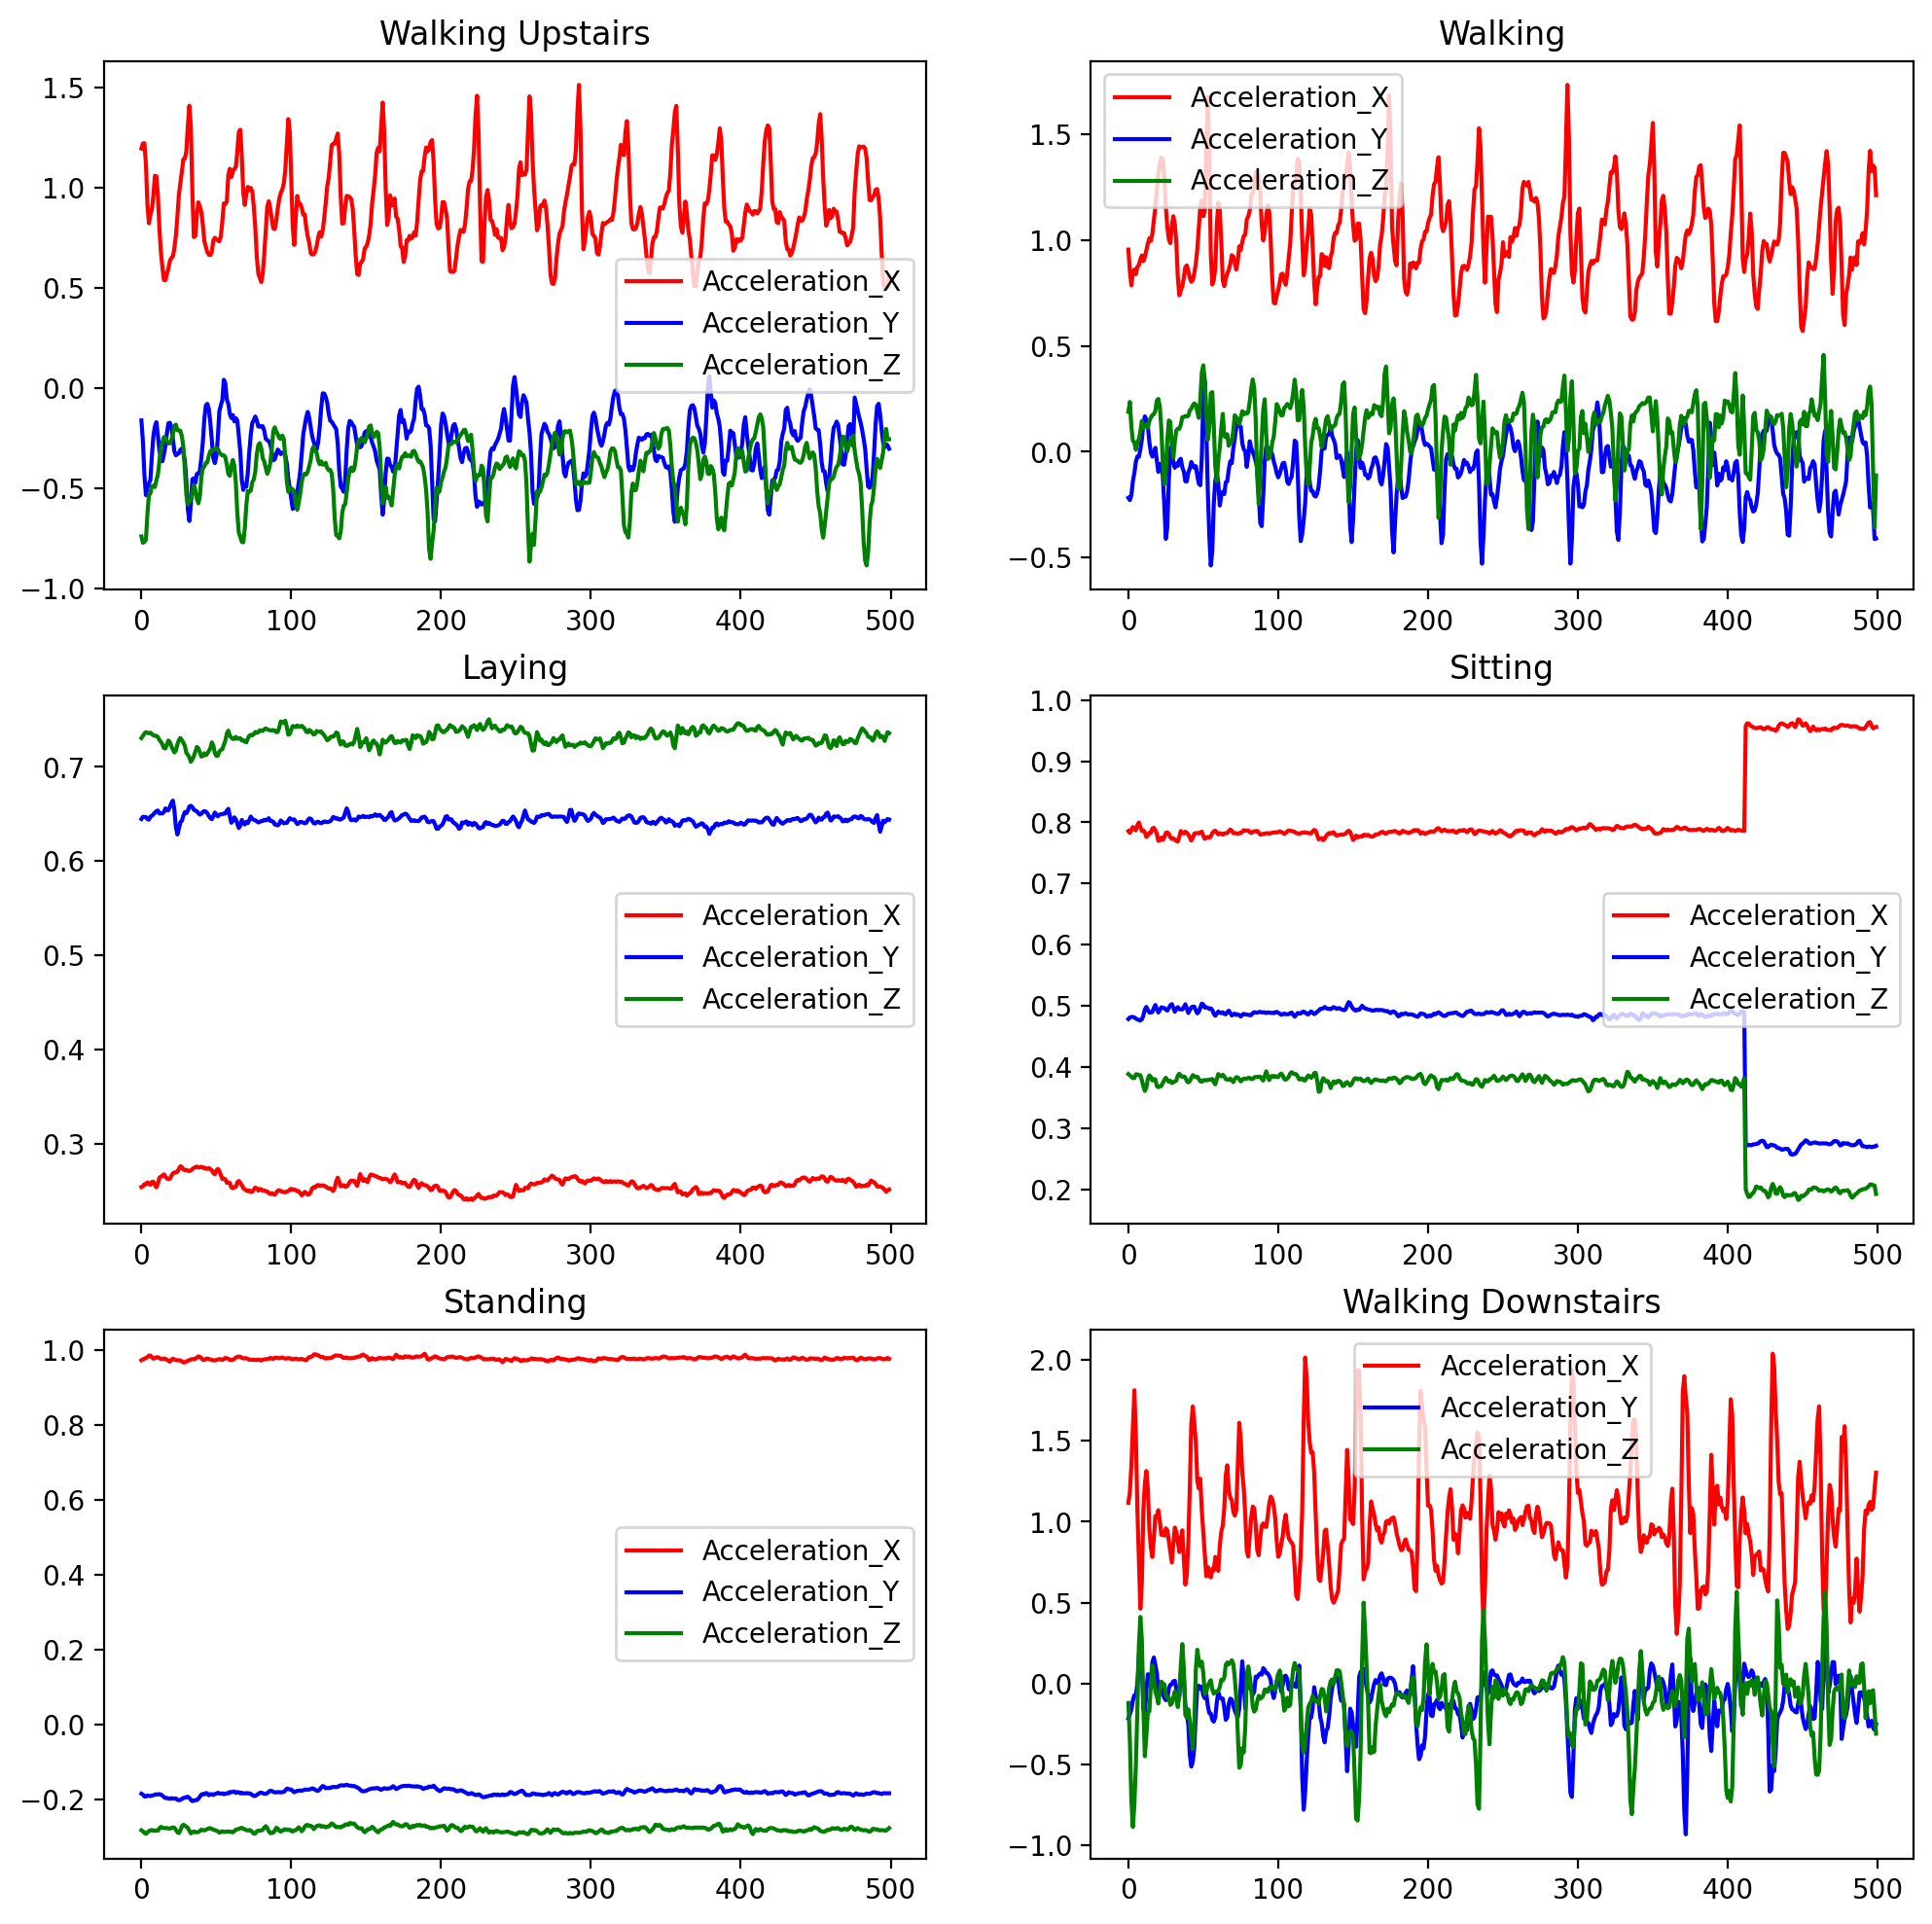

In [37]:
class_names = {1: 'Walking', 2: 'Walking Upstairs', 3: 'Walking Downstairs',
               4: 'Sitting', 5: 'Standing', 6: 'Laying'}
class_labels = [1, 2, 3, 4, 5, 6]
figure, axes = plt.subplots(nrows=3,ncols=2,figsize=(12, 12))
plotted = 0
for x in range(126):
    if y_train[x] in class_labels:
        cl = y_train[x] # class label
        class_labels.remove(cl)
        df = pd.DataFrame(X_train[x])
        y = list(range(500))
        axes[plotted%3][plotted//3].plot(y, df[0], color = 'red', label = 'Acceleration_X')
        axes[plotted%3][plotted//3].plot(y, df[1], color = 'blue', label = 'Acceleration_Y')
        axes[plotted%3][plotted//3].plot(y, df[2], color = 'green', label = 'Acceleration_Z')
        axes[plotted%3][plotted//3].set_title(class_names[cl])
        axes[plotted%3][plotted//3].legend()
        plotted+=1

The difference between static and dynamic activities is quite stark. For static activities, the values of acceleration along the different axes don't have a large range. For all samples of static activities, it seems to be less than 0.1, the exceptions being certain samples of sitting where this range increases dramatically probably indicating that the test subject sat or got up while tha data was being collected instead of remaining seated throughout data collection.

For the dynamic activities, the range of these acceleration values is far higher, being almost 1 for all of them. There is also a discernible periodicity in these values which is expected.

Just looking at these waveforms makes it hard to discern between activites of the same category, the two categories being static and dynamic. There are differences between the waveforms and magnitudes but it might be difficult to predict the specific activity just based on these slight differences, but it still seems very likely that the model reaches a level of accuracy greater than a dummy baseline.

# QUESTION 2

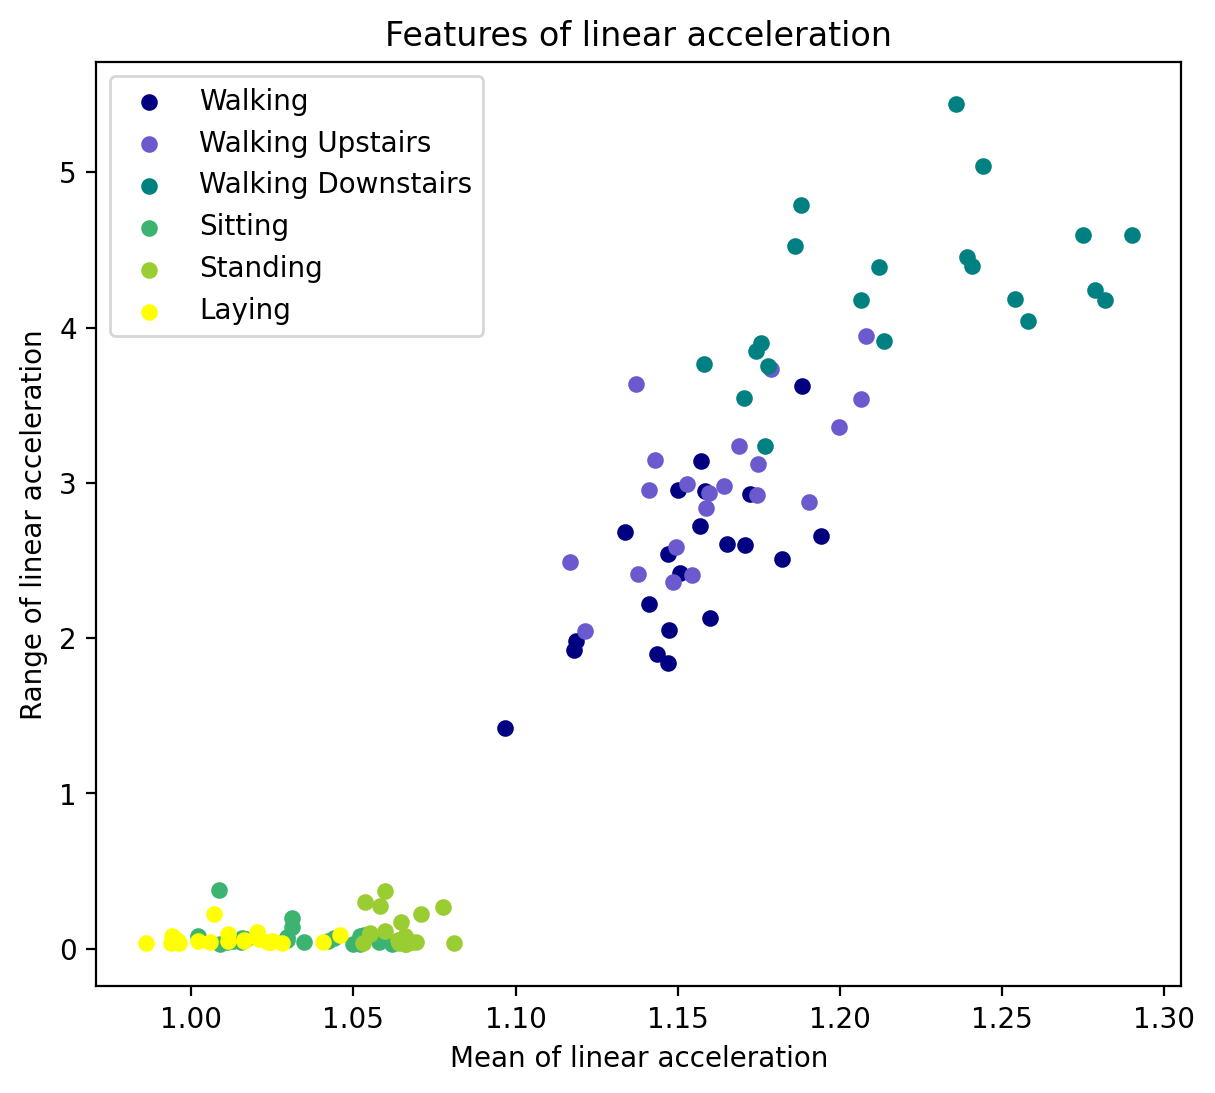

In [71]:
# creating an array with values of total acceleration
x_total_acc = np.sum(X_train**2, axis=2)

# creating a dataframe with some features of linear acceleration
lin_acc_mean = np.mean(x_total_acc, axis = 1)
lin_acc_min = np.min(x_total_acc, axis = 1)
lin_acc_max = np.max(x_total_acc, axis = 1)
lin_acc_range = lin_acc_max - lin_acc_min
x_lin_acc = pd.DataFrame({'mean':lin_acc_mean, 'min': lin_acc_min, 'max':lin_acc_max, 'range':lin_acc_range, 'class':y_train})
class_labels = {1: 'Walking', 2: 'Walking Upstairs', 3: 'Walking Downstairs',
               4: 'Sitting', 5: 'Standing', 6: 'Laying'}
colours = ['navy', 'slateblue', 'teal', 'mediumseagreen', 'yellowgreen', 'yellow']

# plotting a scatter plot using the features
plt.figure(figsize=(7, 6))
for class_value, class_name in class_labels.items():  #loop iterating over activities, plotting each
    df = x_lin_acc[x_lin_acc["class"]==class_value]
    plt.scatter(df["mean"], df["range"], color=colours[class_value - 1], label=class_name, s = 20, linewidths=1.5)
    # labelling the graph
    plt.xlabel('Mean of linear acceleration')
    plt.ylabel('Range of linear acceleration')
    plt.title('Features of linear acceleration')
    plt.legend()  # Show the legend with class names
plt.show()

The scatter plot above plots different samples with the mean and range of linear acceleration of those samples as axes. There is a clear difference between static and dynamic activities that can be seen based on just these features. All samples with mean linear acceleration less than 1 are static and those with range of linear acceleration more than 1 are dynamic. The same distinction can be made based on mean of linear acceleration, with the boundary between static and dynamic activites being somewhere around 1.10.

This suggests that we don't need a machine learning model to distinguish between static and dynamic activites, this distinction can be made using just mean and range of linear acceleration.

## PART 1 - RAW DATA

### PROCESSING RAW DATA WITH PCA

In [38]:
# creating an array with values of total acceleration
x_total_acc = np.sum(X_train**2, axis=2)

# standardizing
scaler = StandardScaler()
X_standardized = scaler.fit_transform(x_total_acc)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# naming all activities
class_names = {1: 'Walking', 2: 'Walking Upstairs', 3: 'Walking Downstairs',
               4: 'Sitting', 5: 'Standing', 6: 'Laying'}
dynamic_activities = {1: 'Walking', 2: 'Walking Upstairs', 3: 'Walking Downstairs'}
static_activities = {4: 'Sitting', 5: 'Standing', 6: 'Laying'}

# colours for each class in raw data, keeping static and dynamic clearly distinguishable
colours_dyn_stat = ["lightcoral", "crimson", "maroon", "lightseagreen", "royalblue", "navy"]

# creating pandas dataframe
x_pca_df = pd.DataFrame(X_pca, columns = ["pca1", "pca2"])
x_pca_df['class'] = y_train

# defining function for scatter plot
def post_pca_scatter_plot(class_dictionary, title, pca_df, colours, edgecolour = None, size = 50, lw = 1.5):
    plt.figure(figsize=(7, 6))
    for class_value, class_name in class_dictionary.items():  #loop iterating over activities, plotting each
        df = pca_df[pca_df["class"]==class_value]
        plt.scatter(df["pca1"], df["pca2"], color=colours[class_value - 1], label=class_name, edgecolor = edgecolour, s = size, linewidths=lw)
    # labelling the graph
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.legend()  # Show the legend with class names
    plt.show()

### SCATTER PLOTS AFTER PROCESSING RAW DATA USING PCA

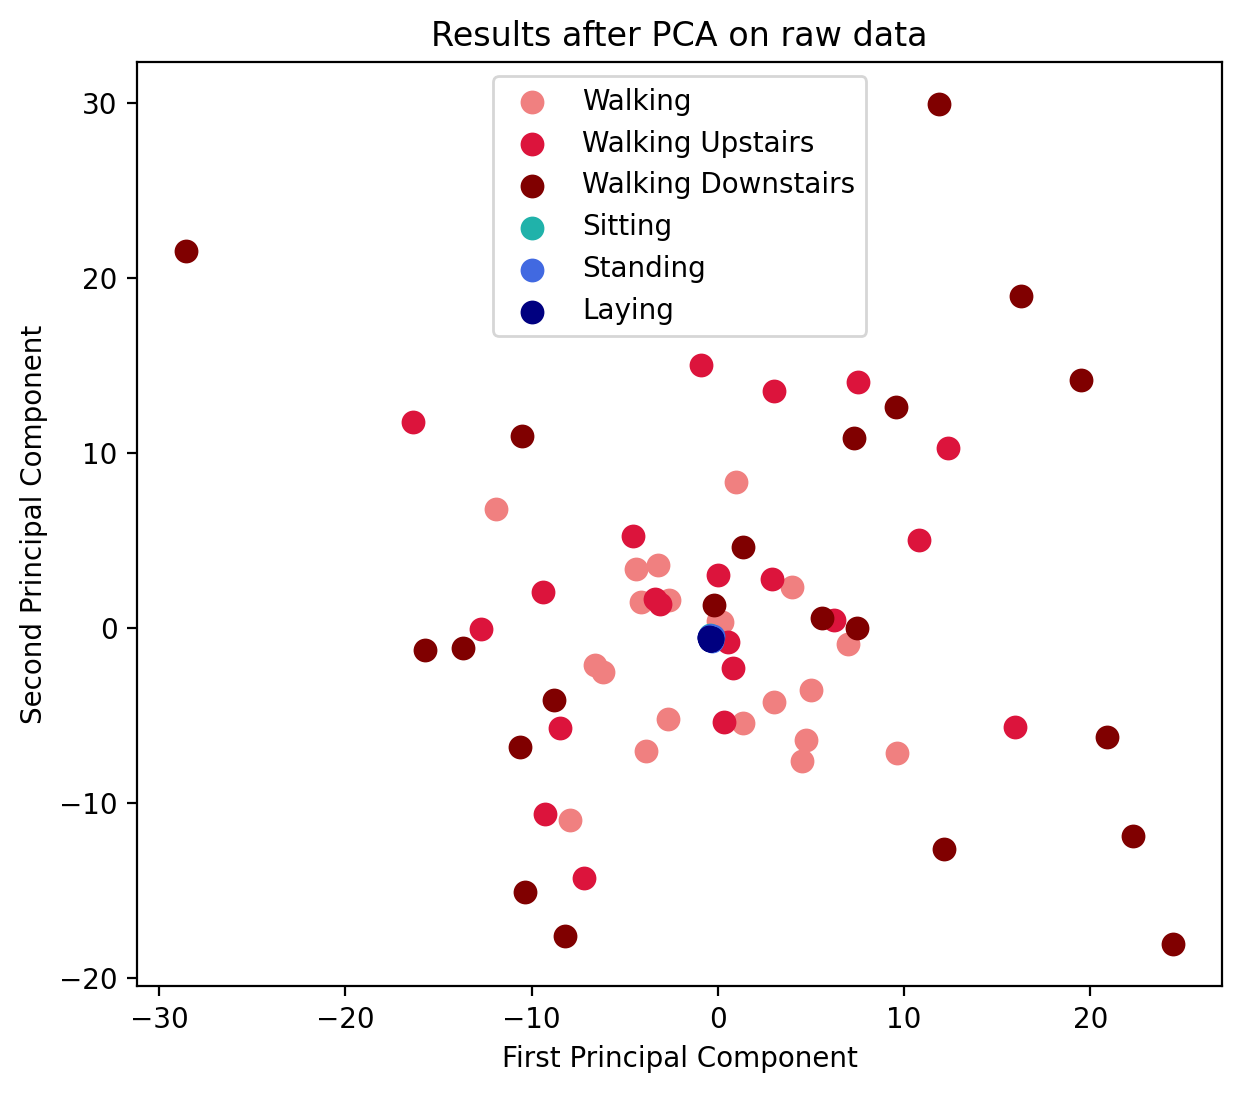

In [39]:
post_pca_scatter_plot(class_names, "Results after PCA on raw data", x_pca_df, colours_dyn_stat)

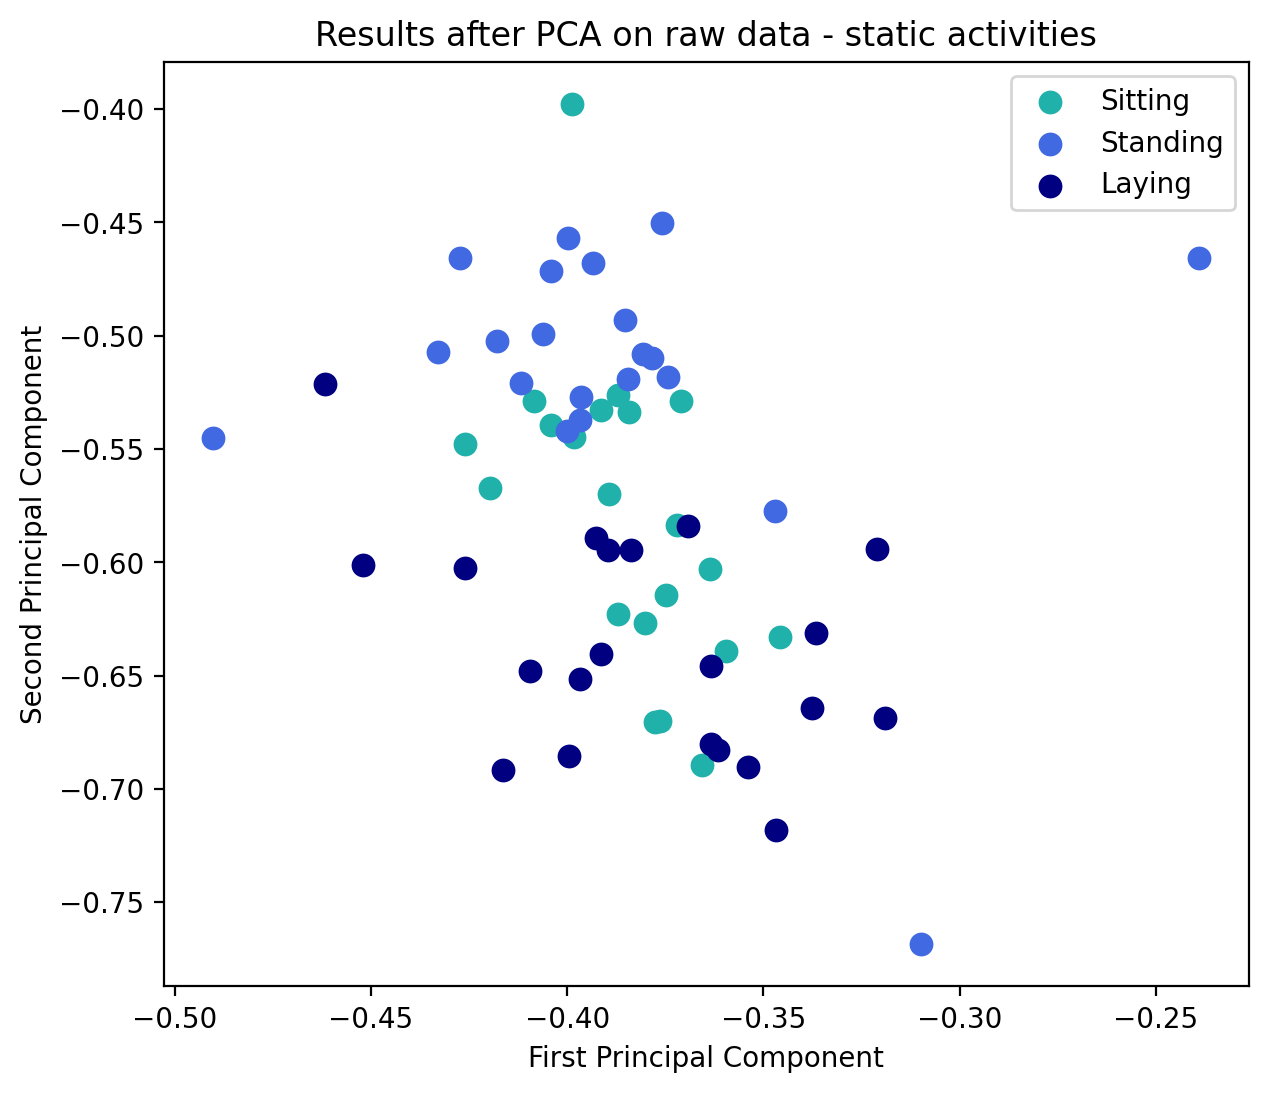

In [40]:
post_pca_scatter_plot(static_activities, "Results after PCA on raw data - static activities", x_pca_df, colours_dyn_stat)

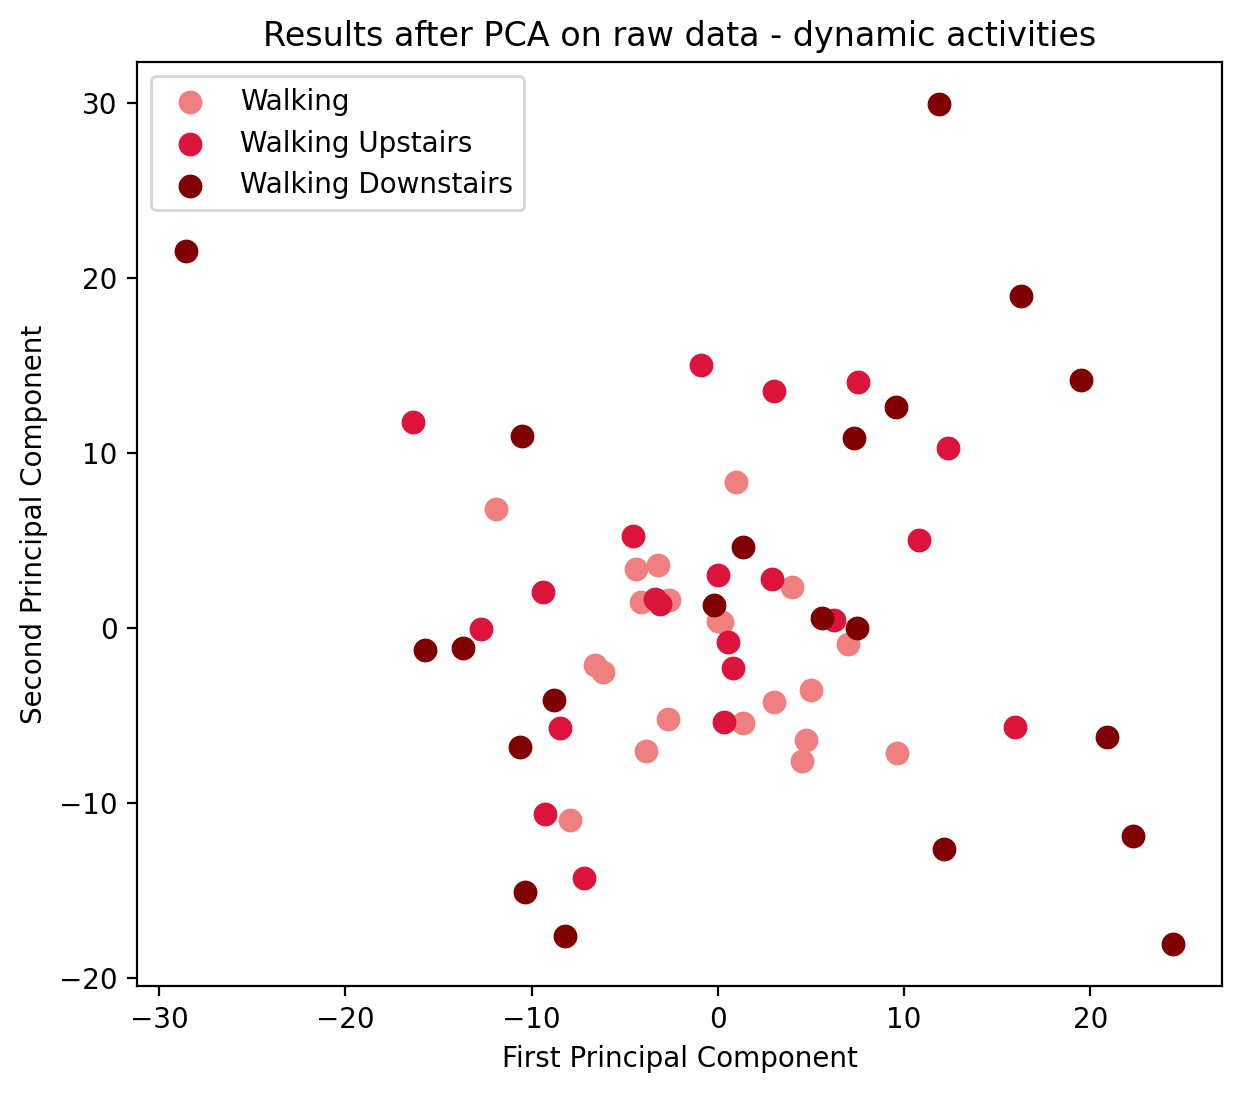

In [41]:
post_pca_scatter_plot(dynamic_activities, "Results after PCA on raw data - dynamic activities", x_pca_df, colours_dyn_stat)

## PART 2 - TSFEL FEATURES

### EXTRACTING FEATURES USING TSFEL

In [42]:
# creating a custom configuration from the existing statistical domain configuration
cgf_file = tsfel.get_features_by_domain('statistical')
features = ["Max", "Min","Mean", "Median", "Standard deviation", "Variance", "Kurtosis",
            "Skewness", "Root mean square", "Entropy", ]
for i in cgf_file['statistical'].keys():
    if i not in features:
        cgf_file['statistical'][i]['use'] = 'no'

# creating a dataframe to store info after tsfel feature extraction
x_tsfel = pd.DataFrame(columns = [None]*40)
check_columns = 0

# extracting features for each sample, one column at a time
for x in range(126): # choosing one sample
    x_df = pd.DataFrame(X_train[x], columns = ['acc_x', 'acc_y', 'acc_z']) # creating dataframe for one sample
    x_df['total_acc'] = x_total_acc[x]                                     # each dataframe has 4 columns
    sample_features_row = [] # creating an empty row
    for column in x_df.columns: # traversing through the 4 columns of the dataset
        extracted_features = tsfel.time_series_features_extractor(cgf_file, x_df[column], verbose=0, fs = 50) 
        sample_features_row.extend(extracted_features.iloc[0].values) # extracting the row of values from the
    x_tsfel.loc[x] = sample_features_row # extracted_features dataframe and setting it as a row in x_tsfel
    if check_columns==0:
        # creating column names
        original_columns = extracted_features.columns
        ends = ['_x', '_y', '_z', '_t']
        new_columns = [f"{col}{end}" for col in original_columns for end in ends]
        x_tsfel.columns = new_columns
        check_columns = 1


### PROCESSING DATA EXTRACTED USING TSFEL WITH PCA

In [43]:
# standardizing the data
scaler = StandardScaler()
tsfel_scaled = scaler.fit_transform(x_tsfel)

# performing pca
pca = PCA(n_components=2)
tsfel_pca = pca.fit_transform(tsfel_scaled)

# creating dataframe with class labels
tsfel_pca = pd.DataFrame(tsfel_pca, columns=['pca1', 'pca2'])
tsfel_pca['class'] = y_train

# creating a list of colours to distinguish all classes
colours_sep_classes = ['navy', 'slateblue', 'teal', 'mediumseagreen', 'yellowgreen', 'yellow']

### SCATTER PLOTS OF TSFEL DATA ANALYSED USING PCA

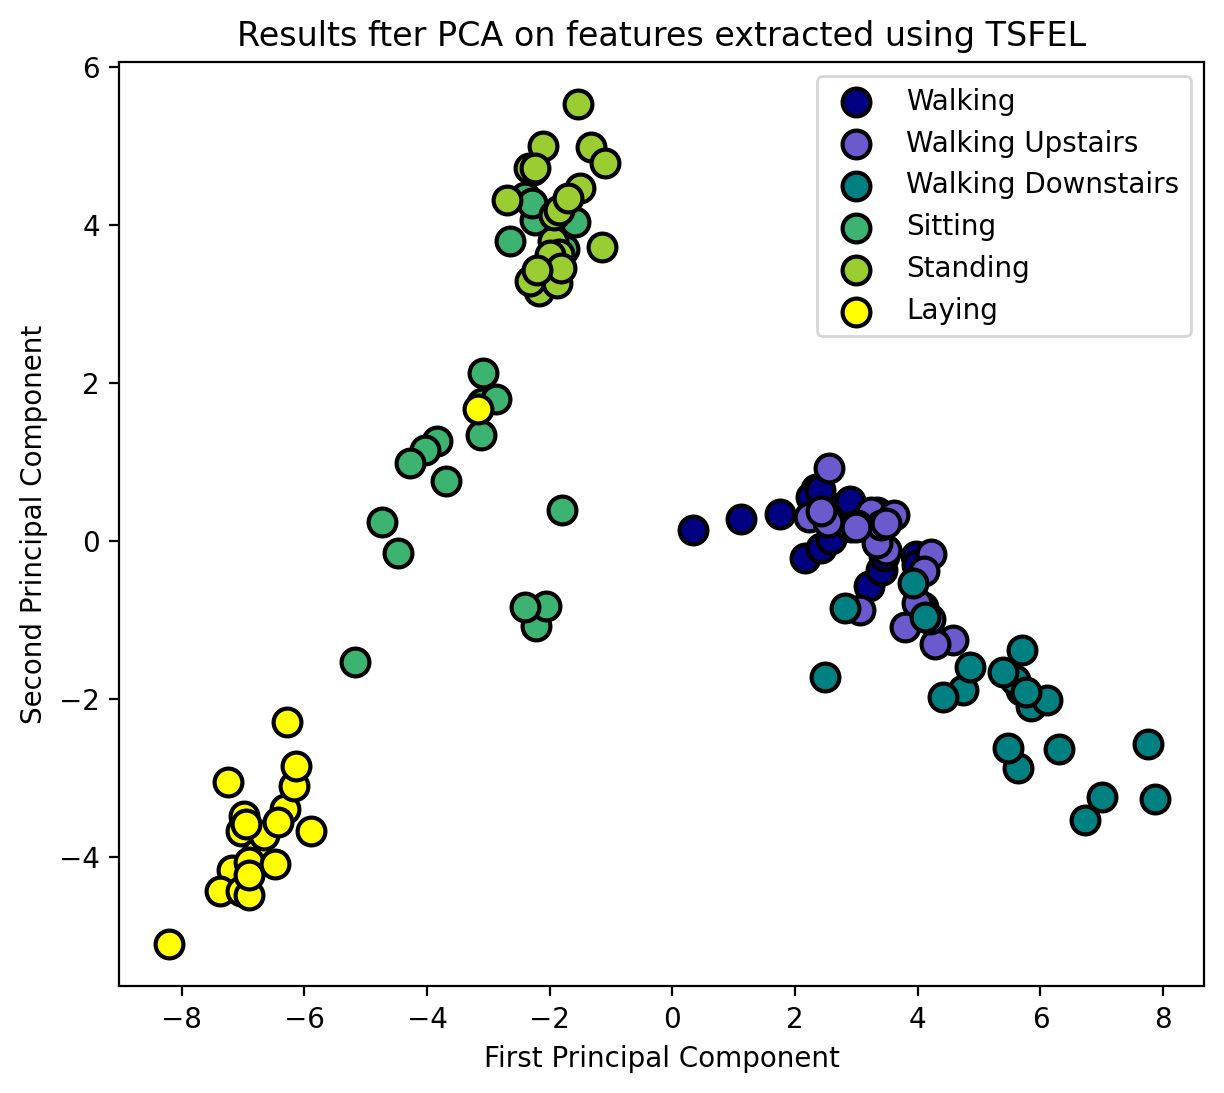

In [44]:
post_pca_scatter_plot(class_names, "Results fter PCA on features extracted using TSFEL", tsfel_pca, colours_sep_classes, 'k', 100)

## PART 3 - DATASET FEATURES

### IMPORTING OTHER FEATURES FROM DATASET

In [45]:
path_x = r"C:\Users\nupoo\OneDrive\Documents\GitHub\es335-24-fall-assignment-1\UCI HAR Dataset\train\X_train.txt"
path_y = r"C:\Users\nupoo\OneDrive\Documents\GitHub\es335-24-fall-assignment-1\UCI HAR Dataset\train\y_train.txt"

other_features_X_train = pd.read_csv(path_x, sep = '\s+')
other_features_y_train = pd.read_csv(path_y, sep = '\s+')

In [46]:
print(other_features_X_train.shape)
print(other_features_y_train.shape)

(7351, 561)
(7351, 1)


### PROCESSING DATA WITH PCA

In [48]:
# standardizing the data
scaler = StandardScaler()
other_features_X_train_standardized = scaler.fit_transform(other_features_X_train)

# performing pca
pca = PCA(n_components=2)
other_features_X_train_pca = pca.fit_transform(other_features_X_train_standardized)

# creating dataframe with class labels 
other_features_pca_df = pd.DataFrame(other_features_X_train_pca, columns = ['pca1', 'pca2'])
other_features_pca_df['class'] = other_features_y_train

### SCATTER PLOTS OF DATASET FEATURES ANALYSED USING PCA

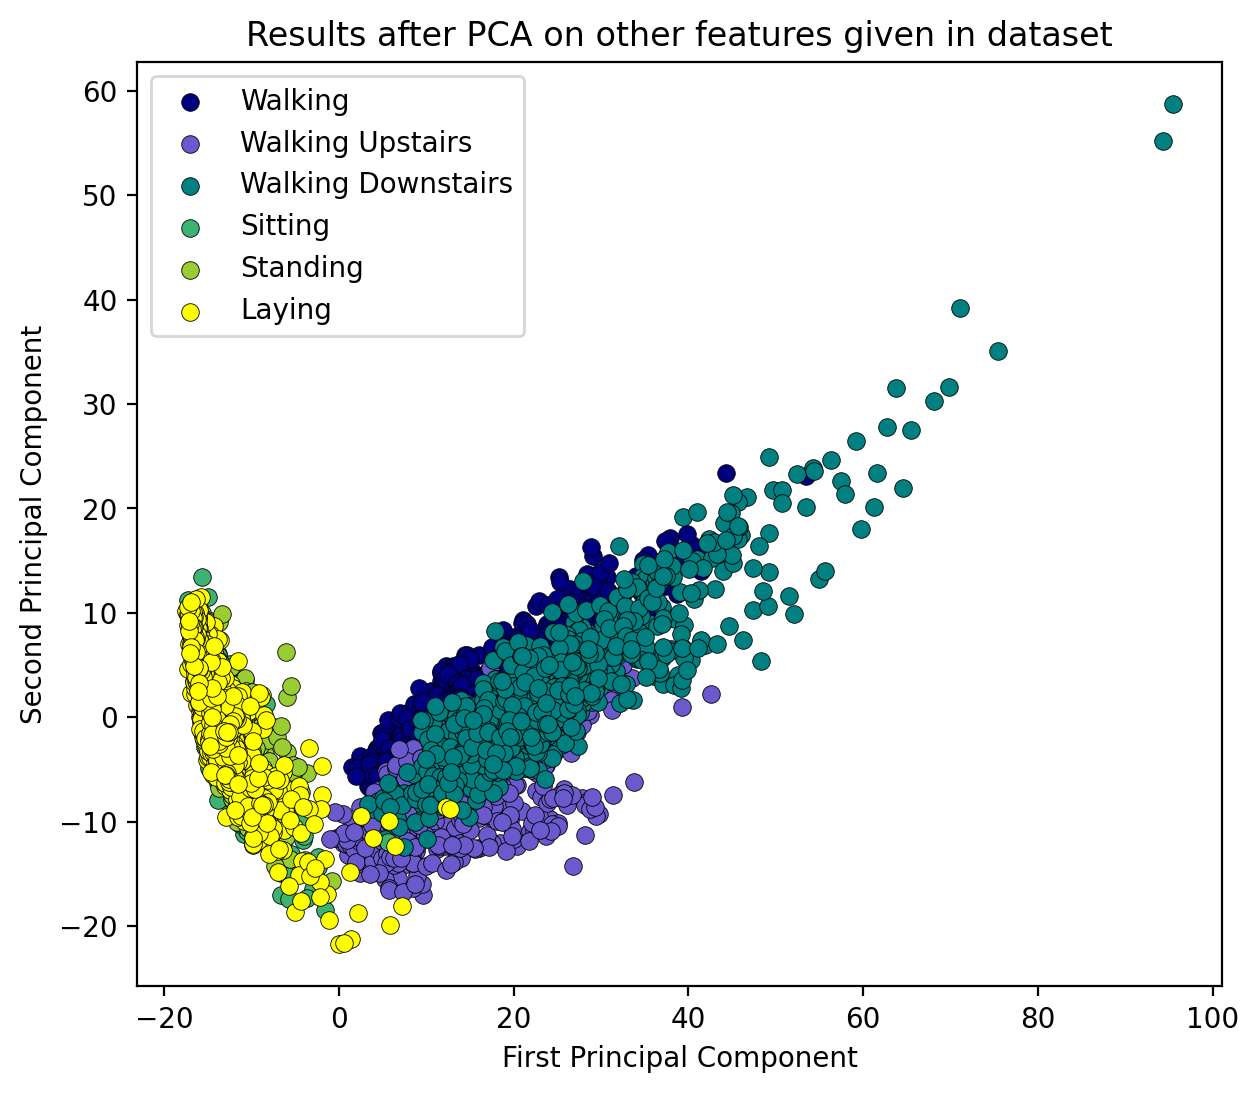

In [73]:
post_pca_scatter_plot(class_names, "Results after PCA on other features given in dataset", other_features_pca_df, colours_sep_classes,'k', 40, 0.3)

## PART 4 - COMPARING THE RESULTS

All three result sets can be used for distinguishing between static and dynamic activites but the only one that allows one to distinguish between all 6 activities is the one obtained after performing PCA on features extracted using TSFEL. Therfore, the second method is best for visualizing the data.

## QUESTION 4

### CORRELATION MATRIX FOR TSFEL FEATURES

In [81]:
corr_tsfel = x_tsfel.corr()
corr_pairs = corr_tsfel.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
most_correlated_pairs = corr_pairs.sort_values(ascending=False)
print(most_correlated_pairs.size)
print(most_correlated_pairs.head(8))

1560
0_Root mean square_x  0_Min_t                 0.998027
0_Min_t               0_Root mean square_x    0.998027
0_Mean_y              0_Mean_z                0.998010
0_Mean_z              0_Mean_y                0.998010
0_Entropy_t           0_Kurtosis_x            0.992956
0_Kurtosis_x          0_Entropy_t             0.992956
0_Max_x               0_Variance_z            0.989981
0_Variance_z          0_Max_x                 0.989981
dtype: float64


This matrix indicates that the five most correlated pairs of features are (rms of acc_x, min of total_acc), (mean of acc_y and mean of acc_z), (entropy of total_acc and kurtosis of x) and (maximum of acc_z and variance of acc_x). Kurtosis seems to be a redundant feature because all the others are standard features and kurtosis isn't an important feature for the kind of data that we have because it is mostly used to analyse outliers. In our case, we're calculating the kurtosis across one sample, outliers are most likely filtered out as is because we have 500 data points per row, so studying them does not seem useful.

### CORRELATION MATRIX FOR DATASET FEATURES

In [92]:
path_c = r"C:\Users\nupoo\OneDrive\Documents\GitHub\es335-24-fall-assignment-1\UCI HAR Dataset\features.txt"
cols = pd.read_csv(path_c, sep = '\s+')
col_names = cols["tBodyAcc-mean()-X"]

In [93]:
print(type(corr_pairs))

<class 'pandas.core.series.Series'>


In [84]:
corr_ofxt = other_features_X_train.corr()
corr_pairs = corr_ofxt.unstack()
corr_pairs
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
most_correlated_pairs = corr_pairs.sort_values(ascending=False)
print(most_correlated_pairs.size)
print(most_correlated_pairs.head(8))

314160
-9.5943388e-001.2  -9.5943388e-001      1.0
-9.5943388e-001    -9.5943388e-001.1    1.0
-9.6895908e-001    -9.6895908e-001.1    1.0
-9.9255572e-001.1  -9.9255572e-001      1.0
-9.9372565e-001    -9.9372565e-001.1    1.0
9.4831568e-002     9.4831568e-002.1     1.0
-9.5055150e-001.1  -9.5055150e-001      1.0
-9.9424782e-001.1  -9.9424782e-001      1.0
dtype: float64
